<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# CP3. [실습] 데이터 전처리와 시각화: 서울날씨

- 본 실습은 간단한 데이터 시각화 방법을 직접 체험하기 위한 것입니다.
- 차트를 화려하게 꾸미는데 목적을 두지 말고 전처리 부분에 중점을 두는 것이 좋습니다.
- 우선 다음과 같은 과정으로 데이터 시각화를 수행함으로 알고 진행하기 바랍니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/visualization.png' width="650" align="left">

In [0]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline   
%config InlineBackend.figure_format = 'retina'

## 1. 데이터 불러오기

- **read_csv()** 함수를 사용해 분석할 데이터를 csv 파일에서 불러옵니다.
- seoul_temp 데이터 셋은 2000.01 ~ 2019.11 서울시 날씨에 대한 정보입니다.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_temp.csv'

In [0]:
# seoul
f_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_temp.csv'
seoul = pd.read_csv(f_path)

## 2. 데이터 확인

- 데이터를 알아야 데이터를 분석할 수 있습니다.
- 우선 분석할 데이터가 어떤 형태의 데이터인지 확인합니다.

**1) 상위/하위 데이터 확인**

- **head()**, **tail()** 메소드로 상/하위 데이터를 확인합니다.

In [3]:
# 상위 5개 행 확인
seoul.head()

,year_month,avg_temp,avg_max_temp,max_temp,avg_min_temp,min_temp,rain,humidity,wind
0,2000.01,-2,2,10.0,-6.0,-12.0,NaN,NaN,NaN
1,2000.01,-2,2,10.0,-6.0,-12.0,NaN,NaN,NaN
2,2000.02,-2,3,8.0,-6.0,-12.0,NaN,NaN,NaN
3,2000.03,6,11,19.0,2.0,NaN,NaN,NaN,NaN
4,2000.04,12,17,NaN,NaN,2.0,NaN,NaN,NaN


In [4]:
# 하위 5개 행 확인
seoul.tail()

,year_month,avg_temp,avg_max_temp,max_temp,avg_min_temp,min_temp,rain,humidity,wind
239,2019.07,26,30,36.0,23.0,19.0,194.0,69.0,2.0
240,2019.08,27,32,37.0,24.0,19.0,191.0,69.0,2.0
241,2019.09,23,27,31.0,19.0,14.0,140.0,65.0,2.0
242,2019.10,16,22,28.0,12.0,5.0,56.0,62.0,2.0
243,2019.11,8,13,22.0,3.0,-5.0,79.0,56.0,2.0


**2) 열 데이터 개수, NaN 값 여부 확인**

- **info()** 메소드로 각 열의 값 개수, **NaN**값 포함 여부를 확인합니다.
- NaN값이 포함되어 있으면 결측치에 대한 해결(제거 또는 변경)이 필요합니다.

In [5]:
# 열 정보, NaN 값 포함 여부 확인
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year_month    244 non-null    float64
 1   avg_temp      244 non-null    int64  
 2   avg_max_temp  244 non-null    int64  
 3   max_temp      243 non-null    float64
 4   avg_min_temp  241 non-null    float64
 5   min_temp      243 non-null    float64
 6   rain          231 non-null    float64
 7   humidity      231 non-null    float64
 8   wind          231 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 17.3 KB


**3) 기초 통계 정보 확인**

- **describe()** 메소드를 사용해 기초 통계 정보를 확인합니다.

In [6]:
# 기초 통계 정보 확인
seoul.describe()

,year_month,avg_temp,avg_max_temp,max_temp,avg_min_temp,min_temp,rain,humidity,wind
count,244.000000,244.000000,244.000000,243.000000,241.000000,243.000000,231.000000,231.000000,231.000000
mean,2009.371475,12.840164,17.393443,24.008230,8.871369,2.905350,118.255411,60.683983,2.372294
std,5.799717,10.093955,10.156032,8.999996,10.171245,11.594531,169.734908,8.334822,0.551609
min,2000.010000,-7.000000,-3.000000,0.000000,-11.000000,-19.000000,0.000000,43.000000,1.000000
25%,2004.087500,3.750000,7.750000,16.000000,-1.000000,-8.000000,26.000000,55.000000,2.000000
50%,2009.095000,14.000000,19.000000,26.000000,9.000000,3.000000,55.000000,60.000000,2.000000
75%,2014.102500,22.000000,27.000000,32.000000,18.000000,14.000000,139.500000,65.000000,3.000000
max,2019.110000,29.000000,33.000000,40.000000,25.000000,22.000000,1131.000000,82.000000,4.000000


**4) 질문**

- seoul 데이터가 분석하기에 적절한 형태인가요?
- seoul 데이터에 대해 어떤 분석이 의미가 있을까요?
- 분석에 걸림돌이 될 만한 것은 무엇일까요?
- 분석을 위해 우선 어떤 처리를 해야 할까요?

## 3. 데이터 전처리

- NaN 값이 포함된 열이 있으면 제거하거나 다른 값으로 채워야 합니다.
- 중복된 데이터는 정확한 분석을 방해하므로 제거해야 합니다.
- 기타 데이터에 방해가 되는 요소를 전처리 과정에서 제거합니다.

**1) 결측치 삭제**

- NaN 값이 많은 2000년은 분석에서 제외하기 위해 dropna() 메소드로 삭제합니다.

In [8]:
# NaN 값을 갖는 행 삭제
seoul.dropna(inplace=True)

# 확인
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 13 to 243
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year_month    231 non-null    float64
 1   avg_temp      231 non-null    int64  
 2   avg_max_temp  231 non-null    int64  
 3   max_temp      231 non-null    float64
 4   avg_min_temp  231 non-null    float64
 5   min_temp      231 non-null    float64
 6   rain          231 non-null    float64
 7   humidity      231 non-null    float64
 8   wind          231 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 18.0 KB


**2) 중복 행 삭제**

- 중복된 행이 있으면 삭제해야 합니다.
- 우선 중복된 행이 있는지 확인합니다.

In [9]:
# 중복 행 개수 확인
seoul.duplicated().sum()

4

In [10]:
# 종복 행 삭제
seoul.drop_duplicates(inplace=True)

# 확인
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 13 to 243
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year_month    227 non-null    float64
 1   avg_temp      227 non-null    int64  
 2   avg_max_temp  227 non-null    int64  
 3   max_temp      227 non-null    float64
 4   avg_min_temp  227 non-null    float64
 5   min_temp      227 non-null    float64
 6   rain          227 non-null    float64
 7   humidity      227 non-null    float64
 8   wind          227 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 17.7 KB


**3) 인덱스 재정렬**

- 몇 몇 행이 제거되면서 인덱스 값에 구멍이 생겼습니다.
- 깔끔한 데이터를 위해 인덱스를 초기화 합니다.

In [12]:
# 인덱스 재정렬
seoul.reset_index(drop=True, inplace=True)

# 확인
seoul.head()

,year_month,avg_temp,avg_max_temp,max_temp,avg_min_temp,min_temp,rain,humidity,wind
0,2001.01,-4,-1,7.0,-8.0,-19.0,39.0,63.0,2.0
1,2001.02,0,4,12.0,-4.0,-10.0,46.0,61.0,2.0
2,2001.03,5,10,21.0,1.0,-6.0,18.0,61.0,3.0
3,2001.04,14,19,28.0,9.0,2.0,12.0,59.0,3.0
4,2001.05,19,25,32.0,15.0,10.0,17.0,64.0,2.0


## 4. 데이터 추가

- 분석에 필요한 데이터가 항상 제공되는 것은 아닙니다.
- 분석을 위해 필요한 데이터를 직접 만들어야 하는 경우가 많습니다.
- 기존 데이터를 사용해 새로운 데이터를 만들 수 있으면 좋습니다.

**1) 열 추가**

- **year_month** 열을 점(.)을 구분자로 하여 **year** 열과 **month** 열로 분리합니다.
- 우선 실수형인 year_month를 문자열 형식으로 바꿉니다.

In [13]:
# 문자열 형식으로 변경
seoul['year_month'] = seoul['year_month'].astype(str)

# 확인
seoul.head(12)

,year_month,avg_temp,avg_max_temp,max_temp,avg_min_temp,min_temp,rain,humidity,wind
0,2001.01,-4,-1,7.0,-8.0,-19.0,39.0,63.0,2.0
1,2001.02,0,4,12.0,-4.0,-10.0,46.0,61.0,2.0
2,2001.03,5,10,21.0,1.0,-6.0,18.0,61.0,3.0
3,2001.04,14,19,28.0,9.0,2.0,12.0,59.0,3.0
4,2001.05,19,25,32.0,15.0,10.0,17.0,64.0,2.0
5,2001.06,23,27,33.0,19.0,16.0,157.0,71.0,2.0
6,2001.07,26,30,33.0,23.0,20.0,698.0,80.0,1.0
7,2001.08,27,31,35.0,23.0,19.0,252.0,77.0,1.0
8,2001.09,23,28,32.0,18.0,11.0,49.0,71.0,1.0
9,2001.1,17,21,25.0,12.0,9.0,68.0,66.0,1.0


- **2001.10**이 **2001.1**이 되었으니 뒷 공백을 0으로 채워야 합니다.
- **ljust()** 메소드는 전체 길이를 지정하고 빈 공간을 어떤 값으로 채울지 지정할 수 있습니다.

In [14]:
# 7자리로 변경하고 우측 공백을 0으로 채우기
seoul['year_month'] = seoul['year_month'].str.ljust(7, '0')

# 확인
seoul.head(12)

,year_month,avg_temp,avg_max_temp,max_temp,avg_min_temp,min_temp,rain,humidity,wind
0,2001.01,-4,-1,7.0,-8.0,-19.0,39.0,63.0,2.0
1,2001.02,0,4,12.0,-4.0,-10.0,46.0,61.0,2.0
2,2001.03,5,10,21.0,1.0,-6.0,18.0,61.0,3.0
3,2001.04,14,19,28.0,9.0,2.0,12.0,59.0,3.0
4,2001.05,19,25,32.0,15.0,10.0,17.0,64.0,2.0
5,2001.06,23,27,33.0,19.0,16.0,157.0,71.0,2.0
6,2001.07,26,30,33.0,23.0,20.0,698.0,80.0,1.0
7,2001.08,27,31,35.0,23.0,19.0,252.0,77.0,1.0
8,2001.09,23,28,32.0,18.0,11.0,49.0,71.0,1.0
9,2001.10,17,21,25.0,12.0,9.0,68.0,66.0,1.0


- 구분자를 기준으로 문자열을 분리하는 것을 **split()** 메소드를 사용합니다.
- 데이터프레임 열에 대한 문자열 메소드 사용은 **str.메소드()** 형태로 해야 합니다.
- 문자열을 분리해 **year**, **month** 열을 새로 만듭니다.

In [21]:
# year, month 열 추가
seoul['year'] = seoul['year_month'].str.split('.', expand=True)[0]
seoul['month'] = seoul['year_month'].str.split('.', expand=True)[1]

# 확인
seoul.head()

,year_month,avg_temp,avg_max_temp,max_temp,avg_min_temp,min_temp,rain,humidity,wind,year,month
0,2001.01,-4,-1,7.0,-8.0,-19.0,39.0,63.0,2.0,2001,01
1,2001.02,0,4,12.0,-4.0,-10.0,46.0,61.0,2.0,2001,02
2,2001.03,5,10,21.0,1.0,-6.0,18.0,61.0,3.0,2001,03
3,2001.04,14,19,28.0,9.0,2.0,12.0,59.0,3.0,2001,04
4,2001.05,19,25,32.0,15.0,10.0,17.0,64.0,2.0,2001,05


- year, month 열 데이터 형식을 **정수로 변경**합니다.

In [22]:
# year, month 열 데이터 형식 변경
seoul['year'] = seoul['year'].astype(int)
seoul['month'] = seoul['month'].astype(int)

# 확인
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year_month    227 non-null    object 
 1   avg_temp      227 non-null    int64  
 2   avg_max_temp  227 non-null    int64  
 3   max_temp      227 non-null    float64
 4   avg_min_temp  227 non-null    float64
 5   min_temp      227 non-null    float64
 6   rain          227 non-null    float64
 7   humidity      227 non-null    float64
 8   wind          227 non-null    float64
 9   year          227 non-null    int64  
 10  month         227 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 19.6+ KB


**2) 불필요한 열 삭제**

- **year_month** 열은 더 이상 필요가 없으니 과감히 삭제합니다.

In [23]:
# year_month 열 삭제
seoul.drop('year_month', axis=1, inplace=True)

# 확인
seoul.head()

,avg_temp,avg_max_temp,max_temp,avg_min_temp,min_temp,rain,humidity,wind,year,month
0,-4,-1,7.0,-8.0,-19.0,39.0,63.0,2.0,2001,1
1,0,4,12.0,-4.0,-10.0,46.0,61.0,2.0,2001,2
2,5,10,21.0,1.0,-6.0,18.0,61.0,3.0,2001,3
3,14,19,28.0,9.0,2.0,12.0,59.0,3.0,2001,4
4,19,25,32.0,15.0,10.0,17.0,64.0,2.0,2001,5


**3) 열 순서 바꾸기**

- 더 깔끔한 데이터를 위해 year, month 열을 맨 앞으로 가져옵니다.

In [25]:
# 열 순서 변경
col_list = ['year', 'month', 'avg_temp', 'avg_max_temp', 'max_temp', 'avg_min_temp', 
            'min_temp', 'rain', 'humidity', 'wind']
seoul = seoul[col_list]

# 확인
seoul.head()

,year,month,avg_temp,avg_max_temp,max_temp,avg_min_temp,min_temp,rain,humidity,wind
0,2001,1,-4,-1,7.0,-8.0,-19.0,39.0,63.0,2.0
1,2001,2,0,4,12.0,-4.0,-10.0,46.0,61.0,2.0
2,2001,3,5,10,21.0,1.0,-6.0,18.0,61.0,3.0
3,2001,4,14,19,28.0,9.0,2.0,12.0,59.0,3.0
4,2001,5,19,25,32.0,15.0,10.0,17.0,64.0,2.0


## 5. 데이터 시각화

- 이제 전처리가 진행된 데이터를 시각화해서 분석합니다.

**1) 2018년 최고/최저 기온**

- 2018년 최고 기온과 최저 기온을 표시해 봅니다.

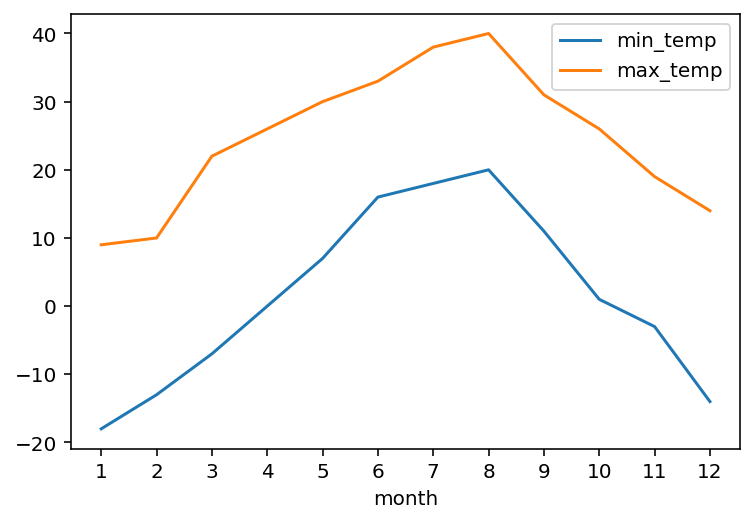

In [26]:
# 2018년 최고/최저 기온
seoul[seoul['year'] == 2018].plot(kind='line', x='month', y=['min_temp', 'max_temp'])
plt.xticks(range(1, 13))
plt.show()

**2) 연도별 최고기온 변화**

- 연도별 최고기온 변화를 표시해 봅니다.

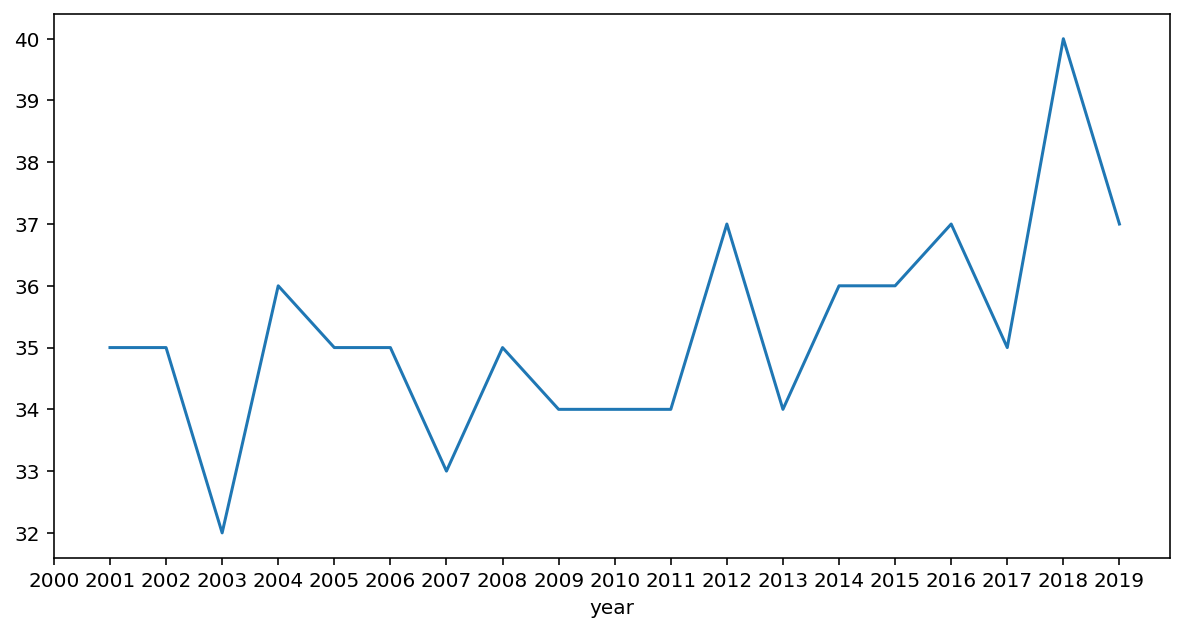

In [27]:
# 연도별 평균기온 변화
seoul.groupby(by='year')['max_temp'].max().plot(kind='line', figsize=(10, 5))
plt.xticks(range(2000, 2020))
plt.show()

**3) 연도별 최대 강수량 변화**

- 연도별 최대 강수량 변화를 표시해 봅니다.

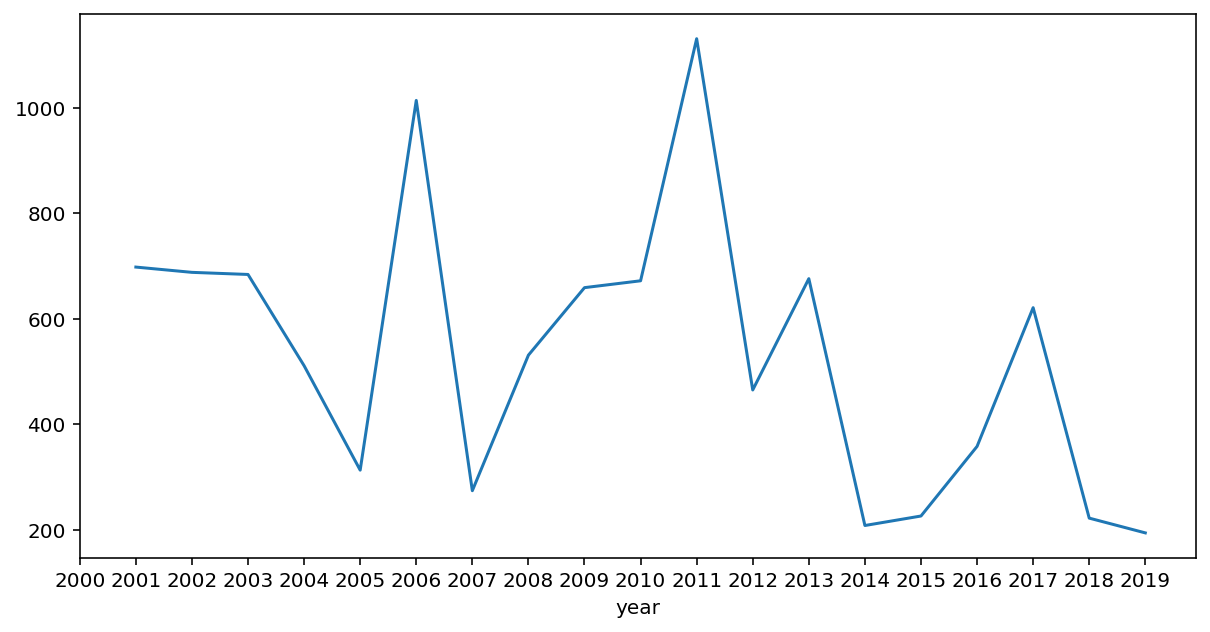

In [28]:
# 연도별 최대강수량 변화
seoul.groupby(by='year')['rain'].max().plot(kind='line', figsize=(10, 5))
plt.xticks(range(2000, 2020))
plt.show()

**[참고] 한반도 가뭄과 장마**

- 2014-15년 한반도 가뭄: https://ko.wikipedia.org/wiki/2014-15%EB%85%84_%ED%95%9C%EB%B0%98%EB%8F%84_%EA%B0%80%EB%AD%84
- 사진으로 본 3년 만에 찾아온 '장마다운 장마’: https://www.hankookilbo.com/News/Read/201707031786220550

**4) 연도별 최대/최저기온 변화**

- 연도별 최고기온과 최저기온을 집계해 concat() 함수로 연결해 표시합니다.

In [0]:
# 연도별 최고기온
s_max = seoul.groupby(by='year')['max_temp'].max()

In [0]:
# 연도별 최저기온
s_min = seoul.groupby(by='year')['min_temp'].min()

In [0]:
# concat()으로 연결
s_max_min = pd.concat([s_max, s_min], axis=1)

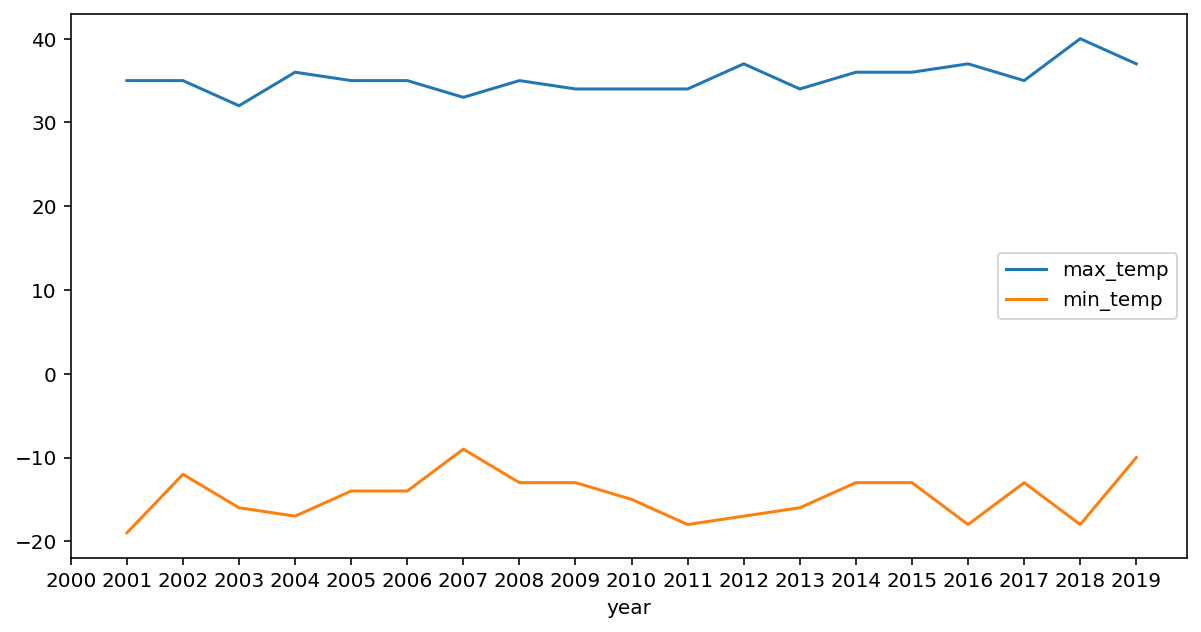

In [32]:
# 연도별 최고/최저 기온
s_max_min.plot(kind='line', figsize=(10, 5))
plt.xticks(range(2000, 2020))
plt.show()

## 6. 의미 찾기

- 데이터 분석을 제대로 하려면 제대로된 데이터가 있어야 합니다.
- 다양한 전처리 방법을 사용해 분석이 용이한 형태로 데이터를 변경해야 합니다.
- 기존 데이터를 활용해 새로운 데이터를 만들 수 있어야 합니다.
- 같은 처리를 반복해 수행하면서 충분히 익숙해져야 합니다.
- 서울의 기온을 분석하면서 과거 한반도의 가움과 장마를 다시 보게 되었습니다.

## <center>수고하셨습니다.</center>
<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=200/></center>